In [968]:
import pandas as pd
from pathlib import Path
base_path = Path('/Users/jastr/OneDrive/Desktop/dane-wakacyjne-wyzwanie') # change path here!

# Klasyfikacja pasażerów Titanica
Po wysłaniu raportu pozostało już tylko czekać. Dni mijały, ale w końcu telefon zadzwonił. Okazało się, że po konsultacji Twojego raportu z najbardziej doświadczonymi specjalistami w dziedzinie, zleceniodawca zdecydował się powierzyć Ci dalszą część tajemniczego zadania. Chodzi oczywiście o... **stworzenie modelu przewidującego szanse przeżycia katastrofy Titanica**.

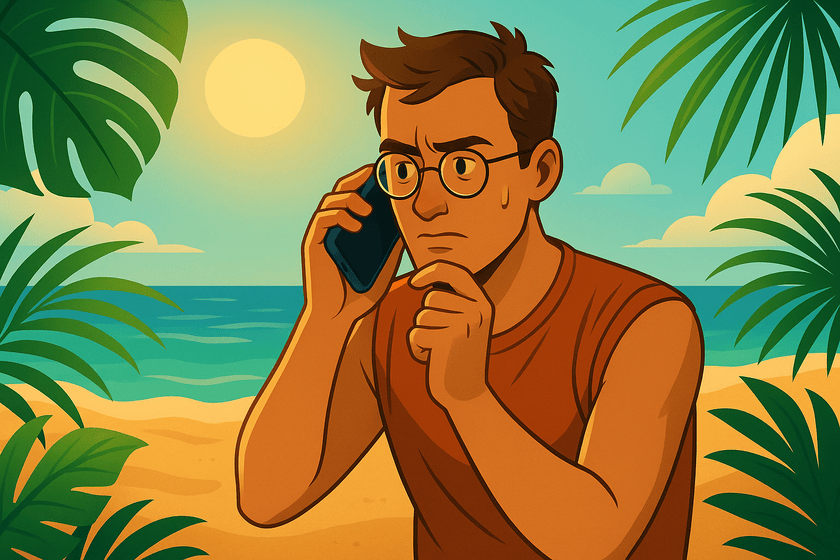

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modeli do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Czego nauczyło Cię o badanym zbiorze danych poprzednie zadanie? Jak możesz wykorzystać wyciągnięte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych może wpływać na zachowanie modelu?
- Co mój model robi i w jaki sposób?
- Jak nie przetrenować wybranego modelu?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- [Nie doprowadź](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (jeśli Twój docelowy model radzi sobie gorzej - uciekaj)
- Przeprowadź badania na dwóch wybranych modelach uczenia maszynowego (np. spośród: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdką [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Dla każdego modelu wybierz co najmniej dwa hiperparametry i przeprowadź badania zależności wyników metryk od wartości hiperparametrów. Zwizualizuj wszystko ładnie, zastanów się dlaczego tak mogło być i wyciągnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Jeśli chcesz, możesz sprawdzić (przyjmując pewne założenia), jakie byłyby Twoje szanse na Titanicu.

Uwaga! Jeśli Titanic to dla Ciebie nic i baaaaardzo chcesz to możesz w ramach tego zadania zająć się [bardziej wymagającym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.

In [969]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
df = pd.read_csv(base_path / 'titanic_clean_df.csv') # import oczyszczonych danych z zadania 1.

In [970]:
df.head() # sprawdzenie

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Life Stage,FamilySize
0,0,3,0,22.0,1,0,7.2500,0,1,2
1,1,1,1,38.0,1,0,71.2833,1,2,2
2,1,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,2,2
4,0,3,0,35.0,0,0,8.0500,0,2,1


In [971]:
df.isnull().sum() # sprawdzenie part 2

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Life Stage    0
FamilySize    0
dtype: int64

## Obserwacje z pierwszego zadania:


Z zadania pierwszego na pewno ważne jest zauważenie silnie skorelowanych danych z przeżyciem np. 'Sex', 'Pclass' czy 'Age'. Przeszkodą może okazać się większa ilośc danych w przypadku ofiar niż osób, które przeżyły. (tak czysto do zbioru)

Rachunek sumienia:  
Przy następnej analizie na pewno bardziej skupiałabym się na analizie wraz z dostosowaniem do modelu, niż na analizie samej w sobie oraz przywiązywała większą uwagę do rozkładów danych.

### Podział danych

In [972]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

### Baseline

In [973]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.57      0.54      0.56       105
           1       0.39      0.42      0.41        74

    accuracy                           0.49       179
   macro avg       0.48      0.48      0.48       179
weighted avg       0.50      0.49      0.49       179



array([[57, 48],
       [43, 31]], dtype=int64)

### Pierwszy model - DecisionTree

In [974]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



array([[91, 14],
       [19, 55]], dtype=int64)

Wyniki wyglądają (chyba) dobrze. Nie ma większych różnic między wynikami danych treningowych i testowych, więc model się nie przeuczył. Plus accuracy i rozpoznawanie przeżycia na poziomie +- 80% to dosyć optymistyczny wynik c:

### Sprawdzenie hiperparametrów

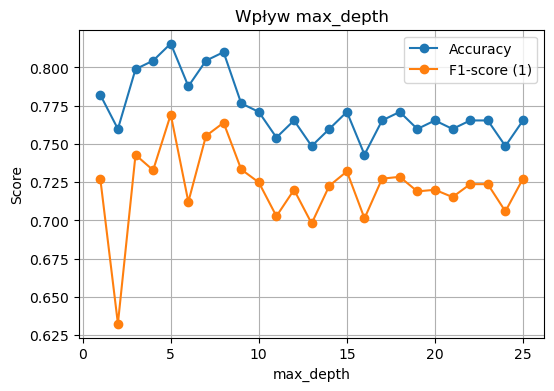

In [975]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

depths = range(1,26)
accuracy_scores = []
f1_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_scores.append(model.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(depths, accuracy_scores, label='Accuracy', marker='o')
plt.plot(depths, f1_scores, label='F1-score (1)', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Wpływ max_depth')
plt.legend()
plt.grid(True)
plt.show()

Można zauważyć, że od max_depth=8, accuracy i F1-score spadają, więc od tej wartości model się przeucza. Podobnie dla wartości 1 i 2 - model się niedoucza. Najlepszy wynik dla max_depth=5

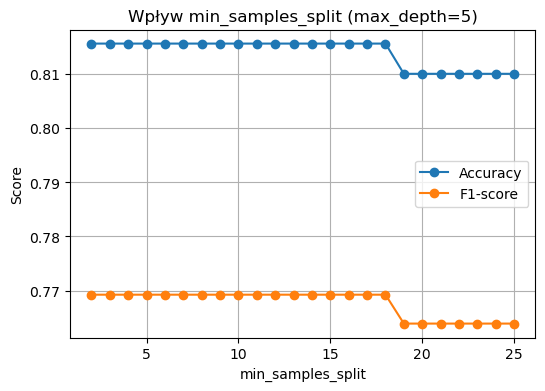

In [976]:
splits = range(2, 26)
accuracy_scores_split = []
f1_scores_split = []

for s in splits:
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=s)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores_split.append(model.score(X_test, y_test))
    f1_scores_split.append(f1_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(splits, accuracy_scores_split, label='Accuracy', marker='o')
plt.plot(splits, f1_scores_split, label='F1-score', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Wpływ min_samples_split (max_depth=5)')
plt.legend()
plt.grid(True)
plt.show()


Wyniki prawie się nie różnią do min_sample_split=18, dopiero powyżej tej wartości znacząco spadają

### Drugi model - KNN

In [977]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # standaryzuje cechy, bo bez tego recall dla 1 to było +- 47% xd
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



array([[88, 17],
       [18, 56]], dtype=int64)

Model osiąga wyniki +-80%. Nie ma większych różnic między wynikami danych treningowych i testowych, więc model się nie przeuczył.

### Sprawdzenie parametrów

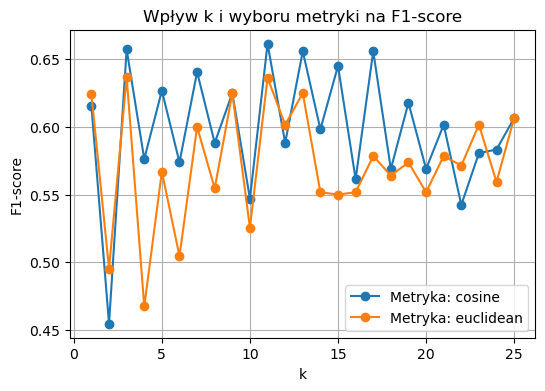

In [978]:
neighbors = range(1, 26)
metrics = ['cosine', 'euclidean']

plt.figure(figsize=(6,4))

for metric in metrics:
    f1_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    plt.plot(neighbors, f1_scores, marker='o', label=f'Metryka: {metric}')

plt.title('Wpływ k i wyboru metryki na F1-score')
plt.xlabel('k')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

Z wykresu wynika, że lepszym wyborem jest metryka cosine, która osiąga zdecydowanie lepsze wyniki. Dodatkowo liczba sąsiadów, która jest najlepsza w tym przypadku to k=3 (przy k=12 obawiam się, że może być zbyt małą czułością). Przy k>17, F1-score spada, co może być spowodowane zbyt małą czułością na szczegóły (większość wrzuca do jednej klasy 1/0). Ogólnie model zdecydowanie lepiej radzi sobie w klasyfikacji ofiar. Może być to spowodowane różnicą w ilości danych lub jakimś błędem modelu, którego nie mogę zlikalizować, także chętnie przyjmę wszelkie sugestie poprawy. 

### Wnioski 

W zadaniu wykorzystałam dwa modele DecisionTree oraz KNN. Oba osiągnęły lepsze wyniki niż Baseline w postaci DummyClassifier'a (jego wynik to około 50% skuteczności). W obu przypadkach lepsze wyniki są osiągane w klasyfikacji ofiar, co podejrzewam, może być wynikiem nierównej liczby danych.

Dodatek: KNN bez użycia StandardScaler() nie działa :c